In [33]:
#Brandon COleman
#Homework 6
#WeatherPy
#5-30-2019
#Data Analytics Bootcamp

# O B S E R V A T I O N S

# 1. The closer we get to the equator the higher the temperature becomes. The data almost but doesn't 
#    quite follow a bell curve, but the trend is observable.

# 2. There doesn't seem to be an observable trend for Humidity and Cloudiness depending on latitutde. 
#    Rainfall or relative distance to a large body of water would be a stronger metric.

# 3. Wind speed also doesn't provide a strong correlation to latitude with varying speeds across the spectrum.


# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

In [ ]:
cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [37]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{base_url}appid={api_key}&units={units}&q="

bold_font = "\033[1m"
norm_font = "\033[0;0m"
cyan = "\033[0;36;47m"

lat = []
lng = []
names = []
humidity = []
wind = []
cloudiness = []
max_temp = []
country = []
dates = []

api_calls = 0
sets = 1
records = 1

In [38]:
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city).json()   
        print(f"Processing Record {records} of Set {sets} | {city}")
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
        dates.append(response['dt'])
        names.append(city)
        records+=1
    except KeyError as ke:
        print("City " + bold_font + "not" + norm_font + " found skipping...")
    if (records == 50):
        sets+=1
        records = 0
        time.sleep(2)
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ayan
Processing Record 2 of Set 1 | staryy nadym
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | ninh binh
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | isangel
Processing Record 9 of Set 1 | ballina
Processing Record 10 of Set 1 | qaqortoq
Processing Record 11 of Set 1 | nantucket
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | saldanha
Processing Record 14 of Set 1 | zhangjiakou
Processing Record 15 of Set 1 | motygino
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | beyneu
Processing Record 18 of Set 1 | grand river south east
City not found skipping...
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | ambodifototra
City not found skipping...
Processing Record 19 of Set 1 | tiksi
Processing Record 20 o

Processing Record 25 of Set 4 | kuche
City not found skipping...
Processing Record 25 of Set 4 | ribeira grande
Processing Record 26 of Set 4 | waingapu
Processing Record 27 of Set 4 | belmonte
Processing Record 28 of Set 4 | yekaterinoslavka
Processing Record 29 of Set 4 | mys shmidta
City not found skipping...
Processing Record 29 of Set 4 | san rafael
Processing Record 30 of Set 4 | ponta do sol
Processing Record 31 of Set 4 | fortuna
Processing Record 32 of Set 4 | turayf
Processing Record 33 of Set 4 | iberia
Processing Record 34 of Set 4 | caraballeda
Processing Record 35 of Set 4 | general cepeda
Processing Record 36 of Set 4 | grand baie
Processing Record 37 of Set 4 | kaeo
Processing Record 38 of Set 4 | mola di bari
Processing Record 39 of Set 4 | hasaki
Processing Record 40 of Set 4 | belawan
Processing Record 41 of Set 4 | yongchang
Processing Record 42 of Set 4 | jagdalpur
Processing Record 43 of Set 4 | portland
Processing Record 44 of Set 4 | severo-kurilsk
Processing Re

Processing Record 46 of Set 7 | dunmore town
Processing Record 47 of Set 7 | nokia
Processing Record 48 of Set 7 | anzio
Processing Record 49 of Set 7 | port hedland
Processing Record 0 of Set 8 | ozgon
City not found skipping...
Processing Record 0 of Set 8 | jega
Processing Record 1 of Set 8 | umzimvubu
City not found skipping...
Processing Record 1 of Set 8 | russell
Processing Record 2 of Set 8 | touros
Processing Record 3 of Set 8 | marcona
City not found skipping...
Processing Record 3 of Set 8 | grand centre
City not found skipping...
Processing Record 3 of Set 8 | attawapiskat
City not found skipping...
Processing Record 3 of Set 8 | salvador
Processing Record 4 of Set 8 | la ronge
Processing Record 5 of Set 8 | fortuna foothills
Processing Record 6 of Set 8 | rock springs
Processing Record 7 of Set 8 | taoudenni
Processing Record 8 of Set 8 | huazolotitlan
City not found skipping...
Processing Record 8 of Set 8 | chapleau
Processing Record 9 of Set 8 | vredendal
Processing Rec

Processing Record 2 of Set 11 | bollnas
Processing Record 3 of Set 11 | waynesville
Processing Record 4 of Set 11 | derzhavinsk
Processing Record 5 of Set 11 | sharjah
Processing Record 6 of Set 11 | tottori
Processing Record 7 of Set 11 | high level
Processing Record 8 of Set 11 | waipawa
Processing Record 9 of Set 11 | norrtalje
Processing Record 10 of Set 11 | mezen
Processing Record 11 of Set 11 | ambovombe
Processing Record 12 of Set 11 | quatre cocos
Processing Record 13 of Set 11 | taree
Processing Record 14 of Set 11 | hecun
Processing Record 15 of Set 11 | buala
Processing Record 16 of Set 11 | hulan
Processing Record 17 of Set 11 | ruteng
Processing Record 18 of Set 11 | mao
Processing Record 19 of Set 11 | roald
Processing Record 20 of Set 11 | hochst
Processing Record 21 of Set 11 | lucea
Processing Record 22 of Set 11 | hinatuan
Processing Record 23 of Set 11 | klaksvik
Processing Record 24 of Set 11 | pilar
Processing Record 25 of Set 11 | nauta
Processing Record 26 of Se

In [39]:
len(dates)


571

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
weather_df = pd.DataFrame({
    "City": names,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": dates,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind   
})

weather_df.to_csv(output_data_file)
weather_df.count()

City          571
Cloudiness    571
Country       571
Date          571
Humidity      571
Lat           571
Lng           571
Max Temp      571
Wind Speed    571
dtype: int64

In [41]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ayan,23,TR,1559254047,96,40.67,33.60,55.34,3.76
1,staryy nadym,100,RU,1559254047,95,65.61,72.68,34.28,17.90
2,jamestown,1,AU,1559254048,92,-33.21,138.60,43.64,1.50
3,lebu,60,ET,1559254048,70,8.96,38.73,61.82,1.90
4,georgetown,20,GY,1559254048,78,6.80,-58.16,84.20,16.11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

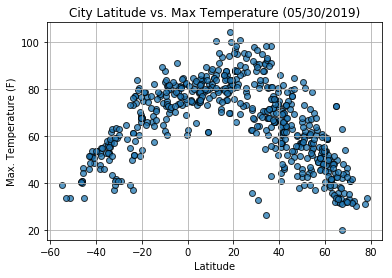

<Figure size 432x288 with 0 Axes>

In [42]:
from datetime import datetime

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o",edgecolor="black", alpha=.75)
plt.title(f"City Latitude vs. Max Temperature {datetime.today().strftime('(%m/%d/%Y)')}")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
plt.savefig("../Images/LatVsTemp.png")

#### Latitude vs. Humidity Plot

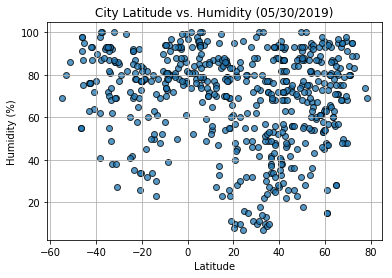

<Figure size 432x288 with 0 Axes>

In [43]:
plt.title(f"City Latitude vs. Humidity {datetime.today().strftime('(%m/%d/%Y)')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o",edgecolor="black", alpha=.75)
plt.grid()
plt.show()
plt.savefig("../Images/LatVsHum.png")

#### Latitude vs. Cloudiness Plot

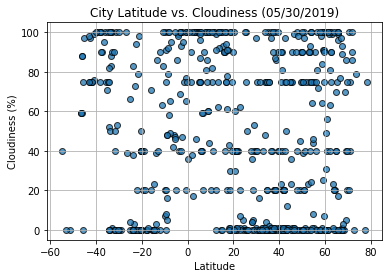

<Figure size 432x288 with 0 Axes>

In [44]:
plt.title(f"City Latitude vs. Cloudiness {datetime.today().strftime('(%m/%d/%Y)')}")
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o",edgecolor="black", alpha=.75)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
plt.savefig("LatvsCloudy.png")

#### Latitude vs. Wind Speed Plot

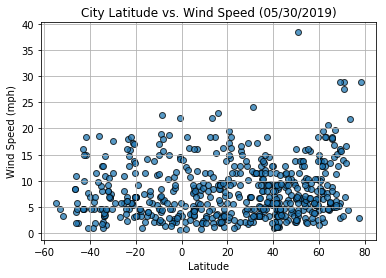

<Figure size 432x288 with 0 Axes>

In [45]:
plt.title(f"City Latitude vs. Wind Speed {datetime.today().strftime('(%m/%d/%Y)')}")
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o",edgecolor="black", alpha=.75)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
plt.savefig("../Images/LatvsWind.png")